In [ ]:
# ガウス分布に規定される拡散

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
x_max, y_max = 5, 5
dx, dy = 0.1, 0.1


def initial_field(x_max, y_max, dx, dy):

    # 初期場(x方向をj, y方向をkとする行列を作成→2D画像のデータ構造を模擬)
    x = np.linspace(0, x_max, int(x_max / dx))
    y = np.linspace(0, y_max, int(y_max / dy))
    z = np.zeros((len(y), len(x)))

    # 2D Gaussian(sigma:分散共分散行列, mu:平均ベクトル)
    sigma11 = 0.3
    sigma22 = 0.3
    sigma12 = 0
    sigma21 = 0


    # center(x,y)
    mu_x, mu_y = 2.5, 1.0

    sigma = np.array([[sigma11, sigma12],
                      [sigma21, sigma22]])
    mu = np.array([mu_x, mu_y])
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)

    # 式のj,kの順番と同じにするため転置させて計算する
    z = z.T
    for j in range(len(z)):
        for k in range(len(z.T)):
            X = np.array([x[j], y[k]])
            z[j, k] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (X - mu).T @ inv_sigma @ (X - mu))


    tem_x, tem_y = 2.5, 4.0
    tem = np.array([tem_x, tem_y])

    for j in range(len(z)):
        for k in range(len(z.T)):
            X = np.array([x[j], y[k]])
            z[j, k] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (X - tem).T @ inv_sigma @ (X - tem))



    z = z.T
    print(type(z))
    print(z.shape)

    return z


initial_field(x_max, y_max, dx, dy)

<class 'numpy.ndarray'>
(50, 50)


array([[1.04400307e-16, 2.40139227e-16, 5.33520429e-16, ...,
        5.33520429e-16, 2.40139227e-16, 1.04400307e-16],
       [3.99983361e-16, 9.20032693e-16, 2.04404854e-15, ...,
        2.04404854e-15, 9.20032693e-16, 3.99983361e-16],
       [1.48016008e-15, 3.40463079e-15, 7.56411230e-15, ...,
        7.56411230e-15, 3.40463079e-15, 1.48016008e-15],
       ...,
       [1.38469928e-05, 3.18505401e-05, 7.07627572e-05, ...,
        7.07627572e-05, 3.18505401e-05, 1.38469928e-05],
       [1.03811708e-05, 2.38785347e-05, 5.30512496e-05, ...,
        5.30512496e-05, 2.38785347e-05, 1.03811708e-05],
       [7.51733356e-06, 1.72912009e-05, 3.84160848e-05, ...,
        3.84160848e-05, 1.72912009e-05, 7.51733356e-06]])

<class 'numpy.ndarray'>
(50, 50)


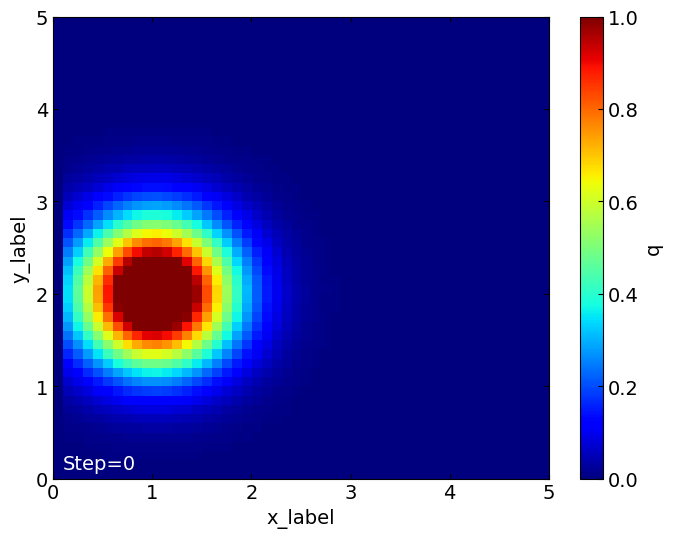

nu_x, nu_y= 0.04999999999999999 0.04999999999999999
Iteration= 0


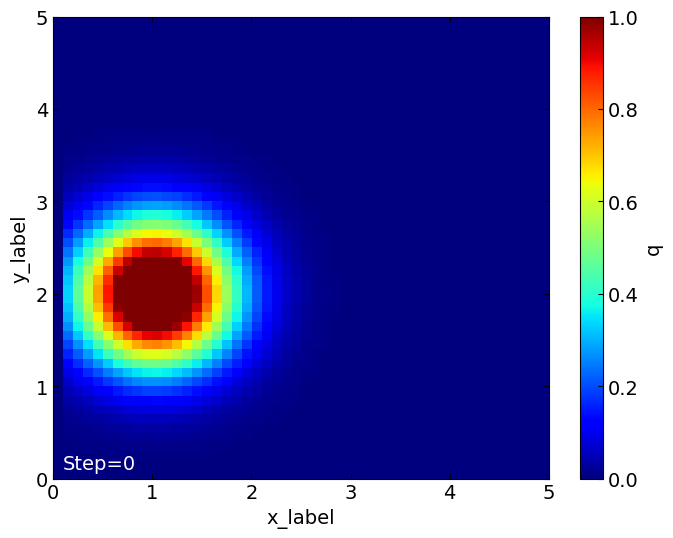

Iteration= 100


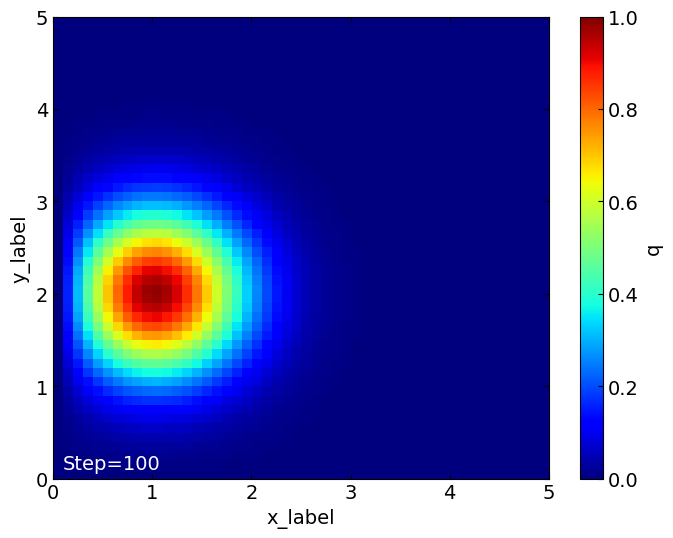

Iteration= 200


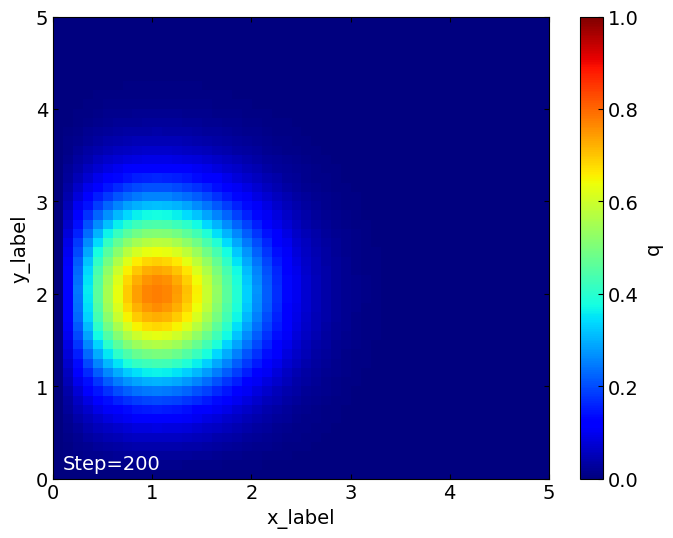

Iteration= 300


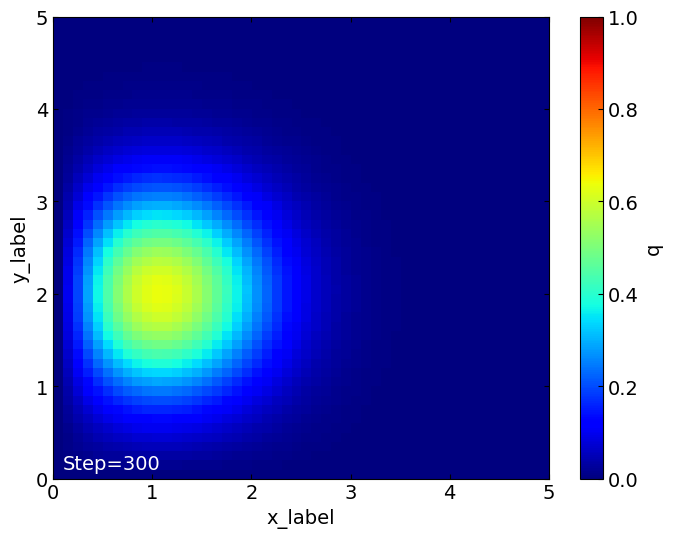

Iteration= 400


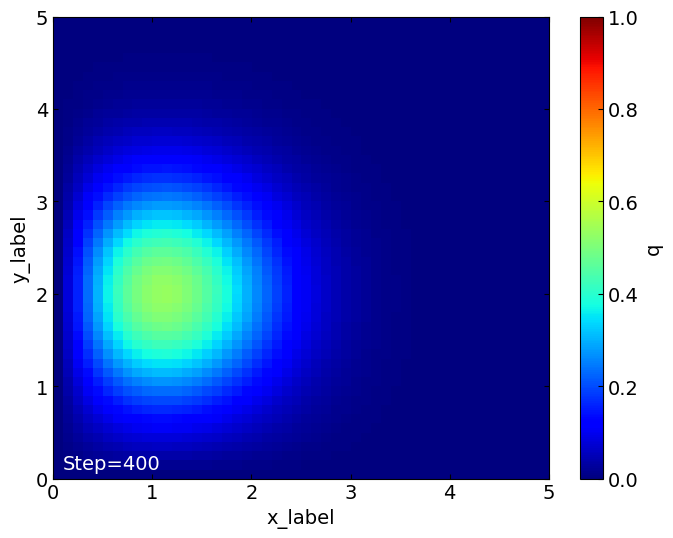

In [ ]:
def initial_field(x_max, y_max, dx, dy):

    # 初期場(x方向をj, y方向をkとする行列を作成→2D画像のデータ構造を模擬)
    x = np.linspace(0, x_max, int(x_max / dx))
    y = np.linspace(0, y_max, int(y_max / dy))
    z = np.zeros((len(y), len(x)))

    # 2D Gaussian(sigma:分散共分散行列, mu:平均ベクトル)
    sigma11 = 0.3
    sigma22 = 0.3
    sigma12 = 0
    sigma21 = 0


    # center(x,y)
    mu_x, mu_y = 1.0, 3.0

    sigma = np.array([[sigma11, sigma12],
                      [sigma21, sigma22]])
    mu = np.array([mu_x, mu_y])
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)

    # 式のj,kの順番と同じにするため転置させて計算する

    def za(z):
       za = z.T
       for j in range(len(z)):
           for k in range(len(z.T)):
               Xa = np.array([x[j], y[k]])
               za[j, k] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (Xa - mu).T @ inv_sigma @ (Xa - mu))
       return za


    """
    tem_x, tem_y = 2.5, 4.0
    tem = np.array([tem_x, tem_y])
    def zb(z):
       zb = z.T
       for j in range(len(z)):
           for k in range(len(z.T)):
               Xb = np.array([x[j], y[k]])
               zb[j, k] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (Xb - tem).T @ inv_sigma @ (Xb - tem))
       return zb

    """

    za = za(z)
    # zb = zb(z)

    z = za
    #z = za + zb
    z = z.T

    print(type(z))
    print(z.shape)
    return x, y, z

def boundary_condition(z):

    # 境界条件(左右上下)
    z[:, 0], z[:, -1], z[0, :], z[-1, :] = 0, 0, 0, 0

    return z

def sol_2d_diffusion(x, y, q, dt, dx, dy, a, step, dir, result_interval):
    ''' 2次元拡散方程式を計算する '''

    # 漸化式を反復計算
    q = q.T
    for i in range(step):
        q0 = q.copy()
        for j in range(1, len(q) - 1):
            for k in range(1, len(q.T) - 1):
                r = a * (dt / dx ** 2)
                s = a * (dt / dy ** 2)
                q[j, k] = q0[j, k] + r * (q0[j+1, k] - 2 * q0[j, k] + q0[j-1, k]) + \
                          s * (q0[j, k+1] - 2 * q0[j, k] + q0[j, k-1])
        # 境界条件を設定
        q = q.T
        q = boundary_condition(q)
        q = q.T

        # 指定した間隔で画像保存
        if i % result_interval == 0:
            print('Iteration=', i)
            q = q.T
            plot(x, y, q, i, dir, 1)
            q = q.T

    return


def plot(x, y, z, i, dir, save_flag):
    ''' 関数をプロットする '''

    plt.rcParams['font.size'] = 14

    # scale inside
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    x_size = 8
    y_size = int(0.8 * x_size * (np.max(y) / np.max(x)))
    fig = plt.figure(figsize=(x_size, y_size))
    ax1 = fig.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.set_xlabel('x_label')
    ax1.set_ylabel('y_label')

    # データをプロットする。
    im = ax1.imshow(z,
                    vmin=0, vmax=1,
                    extent=[np.min(x), np.max(x), np.min(y), np.max(y)],
                    aspect='auto', cmap='jet')

    ax1.text(0.1, 0.1, 'Step='+str(i), color="white")

    # カラーバーを設定する。
    cbar = fig.colorbar(im)
    cbar.set_label('q')

    plt.show()


if __name__ == '__main__':

    # Parameter

    dt = 0.0005  # Time

    # Space
    x_max, y_max = 5, 5  # range
    dx, dy = 0.1, 0.1  # divide

    a = 1  # 拡散係数

    # 初期場を用意する
    x, y, q = initial_field(x_max, y_max, dx, dy)
    #plot(x, y, q, 0, dir, 0)

    # 境界条件を設定する
    q = boundary_condition(q)
    plot(x, y, q, 0, dir, 0)

    # Calculation condition
    step = 500
    result_interval = 100

    # 安定性の確認
    nu_x = a * dt / dx ** 2
    nu_y = a * dt / dy ** 2
    print('nu_x, nu_y=', nu_x, nu_y)

    # 計算を実行
    sol_2d_diffusion(x, y, q, dt, dx, dy, a, step, dir, result_interval)